# Iris Dataset: EDA, Data Visualisation, and Classification
About dataset: [https://en.wikipedia.org/wiki/Iris_flower_data_set](https://en.wikipedia.org/wiki/Iris_flower_data_set) <br/>
![iris](./img/iris_dataset.png)

## Video Workshop
Panduan dan pembahasan materi worskhop ini bisa diakses melalui video berikut ini:

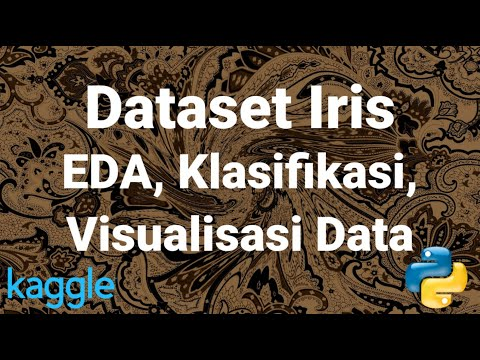

In [1]:
from IPython.display import YouTubeVideo
YouTubeVideo('Op3019SFYzI')

## Iris Dataset: Simple Exploratory Data Analysis (EDA)

#### Import Modules

In [3]:
import pandas as pd # olah dan analisis data

#### Load dataset

In [5]:
iris_df = pd.read_csv('./dataset/iris/Iris.csv') # memuat file csv sebagai data frame
iris_df.head() # tampilkan 5 baris pertama

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
95,96,5.7,3.0,4.2,1.2,Iris-versicolor
96,97,5.7,2.9,4.2,1.3,Iris-versicolor
97,98,6.2,2.9,4.3,1.3,Iris-versicolor
98,99,5.1,2.5,3.0,1.1,Iris-versicolor


#### Drop column 'Id'

In [6]:
# iris_df = iris_df.drop(columns='Id')
iris_df.drop(columns='Id', inplace=True) # menghapus kolom bernama 'Id'
iris_df.head() # tampilkan 5 baris pertama

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


#### Identify the shape of the datatset

In [ ]:
iris_df.shape # bentuk/dimensi dataset (baris,kolom)

#### Get the list of columns

In [ ]:
iris_df.columns # daftar nama kolom

#### Identify data types for each column

In [ ]:
iris_df.dtypes # tipe data untuk tiap kolom

#### Get bassic dataset information

In [ ]:
iris_df.info() # informasi dataset

#### Identify missing values

In [ ]:
# iris_df.isnull().values.any()
iris_df.isna().values.any() # mendeteksi keberadaan nilai kosong

#### Identify duplicate entries/rows

In [ ]:
# iris_df[iris_df.duplicated(keep=False)] # tampilkan seluruh baris dengan duplikasi
iris_df[iris_df.duplicated()] # tampilkan hanya baris duplikasi sekunder

In [ ]:
iris_df.duplicated().value_counts() # hitung jumlah duplikasi data

#### Drop duplicate entries/rows

In [ ]:
iris_df.drop_duplicates(inplace=True) # menghapus duplikasi data
iris_df.shape

#### Describe the dataset

In [ ]:
iris_df.describe() # deskripsi data

#### Correlation Matrix

In [ ]:
iris_df.corr() # korelasi antar kolom

## Iris Dataset: Data Visualisation

#### Import Modules

In [ ]:
import matplotlib.pyplot as plt # visualisasi data
import seaborn as sns # visualisasi data

# output dari visualisasi data akan diarahkan ke notebook
%matplotlib inline 

#### Heatmap

In [ ]:
sns.heatmap(data=iris_df.corr())

#### Bar Plot

In [ ]:
iris_df['Species'].value_counts() # menghitung jumlah setiap species

In [ ]:
iris_df['Species'].value_counts().plot.bar()
plt.tight_layout()
plt.show()

In [ ]:
sns.countplot(data=iris_df, x='Species')
plt.tight_layout()
# sns.countplot?

#### Pie Chart

In [ ]:
iris_df['Species'].value_counts().plot.pie(autopct='%1.1f%%', labels=None, legend=True)
plt.tight_layout()

#### Line Plot

In [ ]:
fig,ax = plt.subplots(nrows=2, ncols=2, figsize=(8,8))

iris_df['SepalLengthCm'].plot.line(ax=ax[0][0])
ax[0][0].set_title('Sepal Length')

iris_df['SepalWidthCm'].plot.line(ax=ax[0][1])
ax[0][1].set_title('Sepal Width')

iris_df.PetalLengthCm.plot.line(ax=ax[1][0])
ax[1][0].set_title('Petal Length')

iris_df.PetalWidthCm.plot.line(ax=ax[1][1])
ax[1][1].set_title('Petal Width')

In [ ]:
iris_df.plot()
plt.tight_layout()

#### Histogram

In [ ]:
iris_df.hist(figsize=(6,6), bins=10)
plt.tight_layout()

#### Boxplot

In [ ]:
iris_df.boxplot()
plt.tight_layout()

In [ ]:
iris_df.boxplot(by="Species", figsize=(8,8))
plt.tight_layout()

#### Scatter Plot

In [ ]:
sns.scatterplot(x='SepalLengthCm', y='SepalWidthCm', data=iris_df, hue='Species')
plt.tight_layout()

#### Pair Plot

In [ ]:
sns.pairplot(iris_df, hue='Species', markers='+')
plt.tight_layout()

#### Violin Plot

In [ ]:
sns.violinplot(data=iris_df, y='Species', x='SepalLengthCm', inner='quartile')
plt.tight_layout()

## Iris Dataset: Classification Models

#### Import Modules

In [ ]:
from sklearn.model_selection import train_test_split # pembagi dataset menjadi training dan testing set
from sklearn.metrics import accuracy_score,confusion_matrix, classification_report # evaluasi performa model

#### Dataset: Features & Class Label

In [ ]:
X = iris_df.drop(columns='Species') # menempatkan features ke dalam variable X
X.head() # tampilkan 5 baris pertama

In [ ]:
y = iris_df['Species'] # menempatkan class label (target) ke dalam variabel y
y.head() # tampilkan 5 baris pertama

#### Split the dataset into a training set and a testing set

In [ ]:
# membagi dataset ke dalam training dan testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=10)

print('training dataset')
print(X_train.shape)
print(y_train.shape)
print()
print('testing dataset:')
print(X_test.shape)
print(y_test.shape)

#### K Nearest Neighbors

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
k_range = list(range(1,26))
scores = []
for k in k_range:
    model_knn = KNeighborsClassifier(n_neighbors=k) # konfigurasi algoritma
    model_knn.fit(X_train, y_train) # training model/classifier
    y_pred = model_knn.predict(X_test) # melakukan prediksi
    scores.append(accuracy_score(y_test, y_pred)) # evaluasi performa

In [ ]:
plt.plot(k_range, scores)
plt.xlabel('Value of k for KNN')
plt.ylabel('Accuracy Score')
plt.title('Accuracy Scores for Values of k of k-Nearest-Neighbors')
plt.tight_layout()
plt.show()

In [ ]:
model_knn = KNeighborsClassifier(n_neighbors=3) # konfigurasi algoritma
model_knn.fit(X_train,y_train) # training model/classifier
y_pred = model_knn.predict(X_test) # melakukan prediksi

##### Accuracy Score

In [ ]:
print(accuracy_score(y_test, y_pred)) # evaluasi akurasi

##### Confusion Matrix

In [ ]:
print(confusion_matrix(y_test, y_pred)) # evaluasi confusion matrix

##### Classification Report

In [ ]:
print(classification_report(y_test, y_pred)) # evaluasi klasifikasi

#### Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
# model_logreg = LogisticRegression()
model_logreg = LogisticRegression(solver='lbfgs', multi_class='auto')
model_logreg.fit(X_train,y_train)
y_pred = model_logreg.predict(X_test)

##### Accuracy Score

In [ ]:
print(accuracy_score(y_test, y_pred))

##### Confusion Matrix

In [ ]:
print(confusion_matrix(y_test, y_pred))

##### Classification Report

In [ ]:
print(classification_report(y_test, y_pred))

#### Support Vector Classifier

In [ ]:
from sklearn.svm import SVC

In [ ]:
# model_svc = SVC()
model_svc = SVC(gamma='scale')
model_svc.fit(X_train,y_train)
y_pred = model_svc.predict(X_test)

#### Decision Tree Classifier

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
model_dt = DecisionTreeClassifier()
model_dt.fit(X_train,y_train)
y_pred = model_dt.predict(X_test)

#### Random Forest Classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
# model_rf = RandomForestClassifier()
model_rf = RandomForestClassifier(n_estimators=100)
model_rf.fit(X_train,y_train)
pred_rf = model_rf.predict(X_test)

#### Accuracy comparision for various models.

In [ ]:
models = [model_knn, model_logreg, model_svc, model_dt, model_rf]
accuracy_scores = []
for model in models:
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_scores.append(accuracy)
    
print(accuracy_scores)

In [ ]:
plt.bar(['KNN', 'LogReg', 'SVC', 'DT', 'RF'],accuracy_scores)
plt.ylim(0.90,1.01)
plt.title('Accuracy comparision for various models', fontsize=15, color='r')
plt.xlabel('Models', fontsize=18, color='g')
plt.ylabel('Accuracy Score', fontsize=18, color='g')
plt.tight_layout()
plt.show()

## Study References
### (In Indonesian)
### Struktur Data bawaan (built-in) pada pemrograman Python

In [ ]:
YouTubeVideo('3Og1xO15HhQ')

### Pythonic: Penulisan kode Python yang idiomatic

In [ ]:
YouTubeVideo('BHP3J8akr74')

### HackerRank: Latihan soal pemrograman Python

In [ ]:
YouTubeVideo('kwlRZUjzsns')

### Statistika Deskriptif

In [ ]:
YouTubeVideo('el7Ezn9PpWU')